In [1]:
from pathlib import Path

import cv2 as cv
import numpy as np
from cv2 import Mat
from matplotlib import pyplot as plt

## Konfigurieren von Variablen

In [2]:
img_dir = Path("../../data/images")

# Laden eines Bildes in eigenem Fenster

In [3]:
img = cv.imread(str(img_dir / "lena_std.tif"), -1)
cv.imshow('image', img)
k = cv.waitKey(0)
cv.destroyAllWindows()

# Laden eines Bildes im Jupyter Notebook

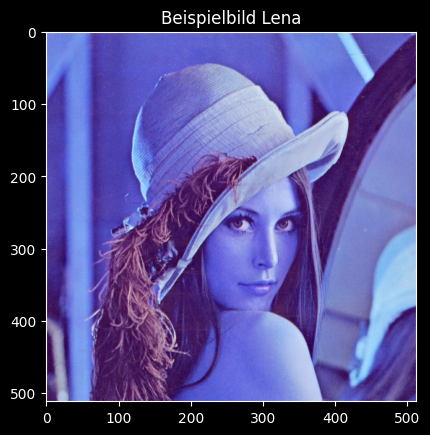

In [4]:
img = cv.imread(str(img_dir / "lena_std.tif"), -1)
%matplotlib inline
plt.imshow(img)
plt.title('Beispielbild Lena')
plt.show()

# Warum ist das Bild farbfremd? 
Wir arbeiten aktuell im Farbraum Rot-Grün-Blau. 
- Bildverarbeitungsbib. OpenCV arbeitet mit der Reihenfolge Blau-Grün-Rot
- Inline-Visualisierungsbib. Matplotlib arbeitet mit der Reihenfolge Rot-Grün-Blau
Eine Umwandlung des Farbraumes BGR2RGB ist somit notwendig.

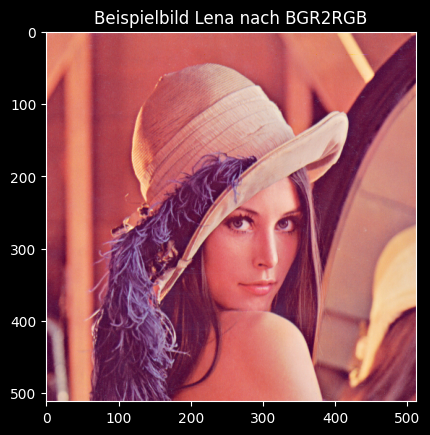

In [5]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Beispielbild Lena nach BGR2RGB')
plt.show()

# Zugriff auf die Farbkanäle

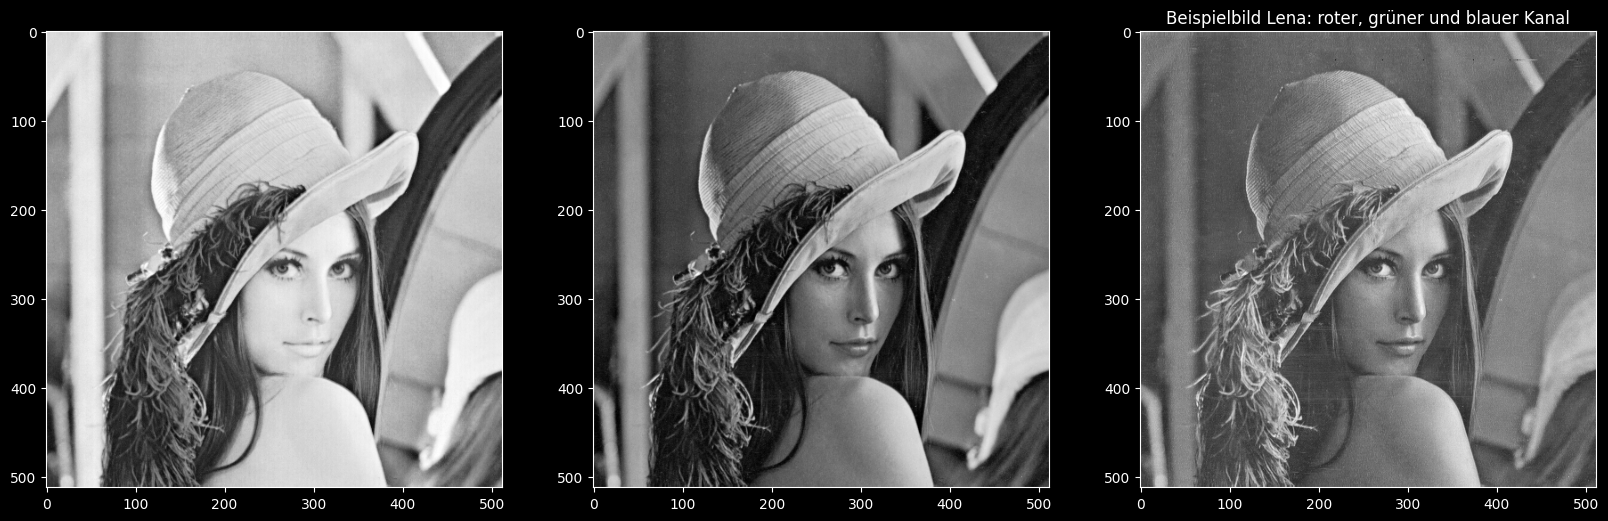

In [6]:
img_r = img_rgb[:,:,0]
img_g = img_rgb[:,:,1]
img_b = img_rgb[:,:,2]
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,10))
ax1.imshow(img_r, cmap='gray')
ax2.imshow(img_g, cmap='gray')
ax3.imshow(img_b, cmap='gray')
plt.title('Beispielbild Lena: roter, grüner und blauer Kanal')
plt.show()

# Umwandlung von RGB in Grauwerte

Max. Wert:  237.60000000000002


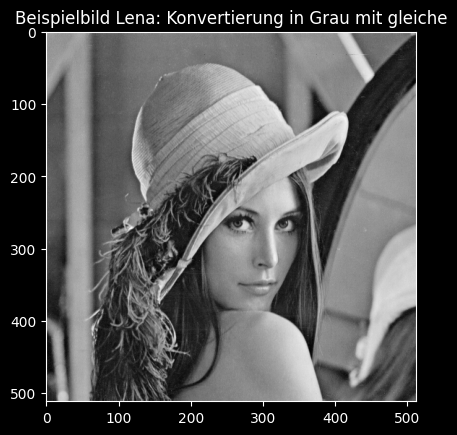

In [7]:
img_gray = np.dot(img_rgb[...,:3], [0.33,0.33,0.33])
print('Max. Wert: ', np.max(img_gray))

plt.imshow(img_gray, cmap='gray')
plt.title('Beispielbild Lena: Konvertierung in Grau mit gleiche')
plt.show()

## Vergleiche eigene Konvertierung mit OpenCV Konvertierung

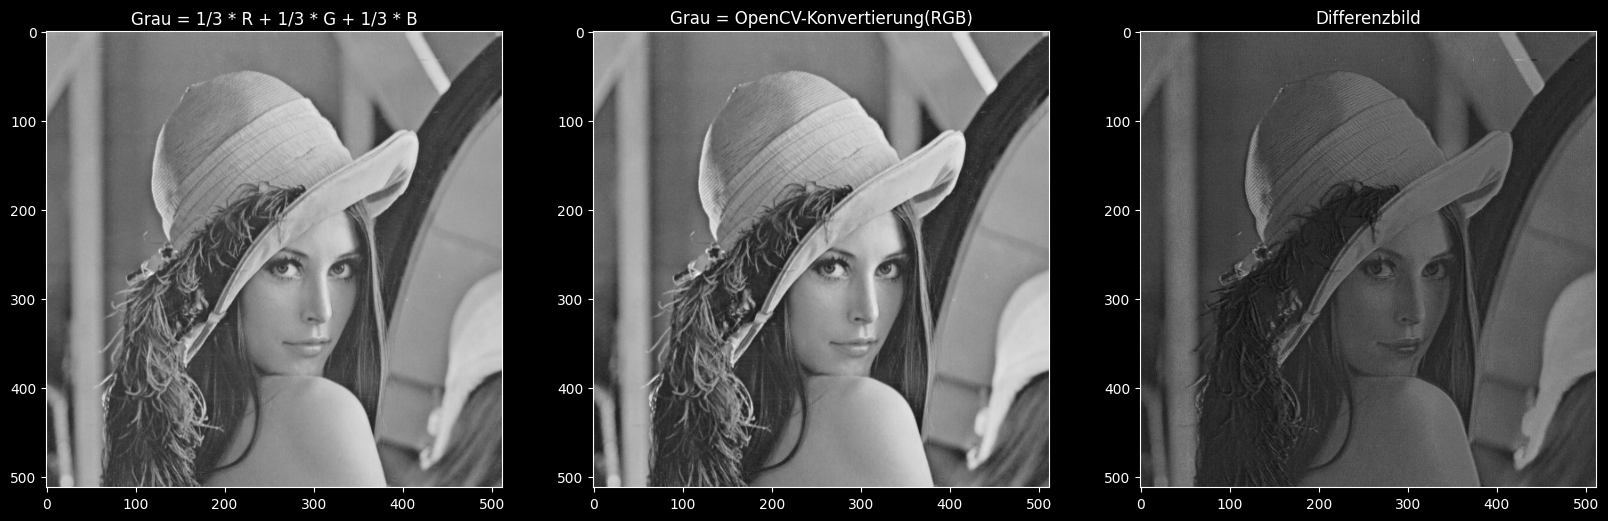

Absoluter Fehler:  1456568.46


In [8]:
img_gray_cv = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,10))
# linkes Bild: eigene Konvertierung
# rechtes Bild: OpenCV Konvertierung
ax1.imshow(img_gray, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Grau = 1/3 * R + 1/3 * G + 1/3 * B')
ax2.imshow(img_gray_cv, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Grau = OpenCV-Konvertierung(RGB)')
# Differenz der Bilder berechnen
img_diff = img_gray_cv - img_gray
ax3.imshow(img_diff, cmap='gray')
ax3.set_title('Differenzbild')
plt.show()
err_gray_conversion = np.round(np.sum(np.abs(img_diff)), 2)
print('Absoluter Fehler: ', err_gray_conversion)

Die eigene Konvertierung mit der gleichen Gewichtung der einzelnen Farbkanäle entspricht nicht der Grauwertkonvertierung durch OpenCV. 

**Warum ist dies so?**

Der Grün-Anteil im menschlichen Auge hat den größten Einfluss auf die Helligkeitswahrnehmung. Daher wird der grüne Kanal bei der Grauwertbildung entsprechend des YUV-Modells höher gewichtet. (Auch der Bayer-Kamerasensor besteht dadurch aus einem zu 50 % grün-sensitivem Bereich, während sich die anderen 50 % auf rot und blau aufteilen.)

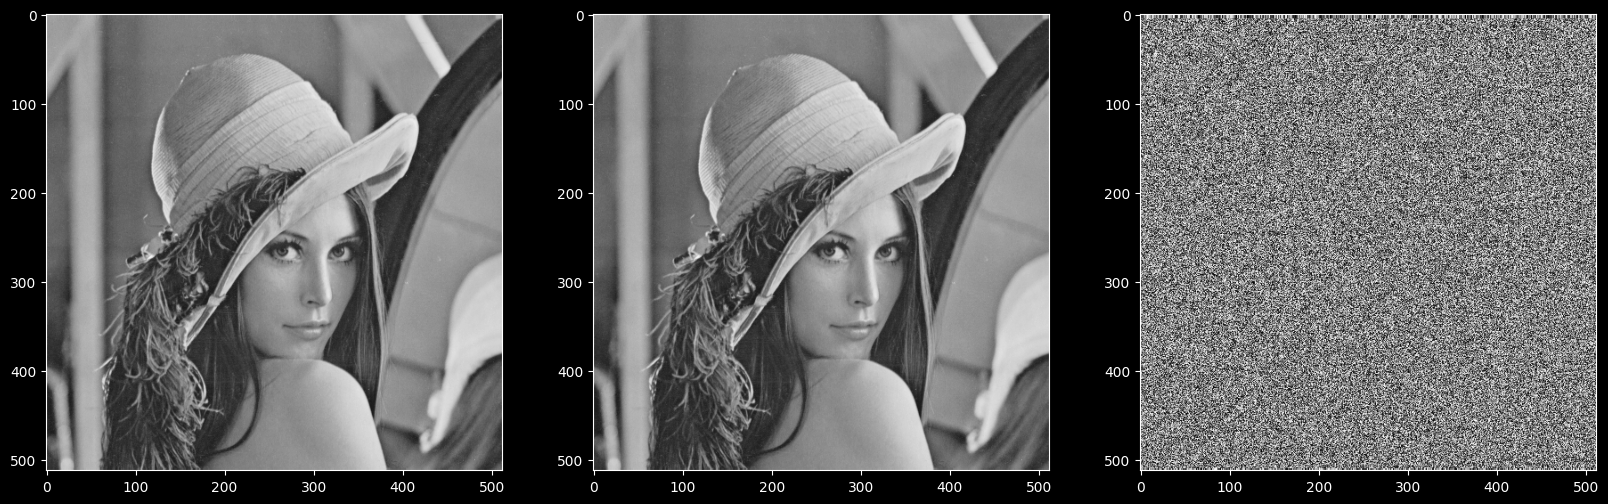

Absoluter Fehler:  65563.25
Unterschied beider Fehler (gleich-gewichteter Grauwert und YUV-Gewichtung):
1456568.46  /  65563.25  =  22.22


In [9]:
# Neue Berechnung der Grauwerte durch Gewichtung gemäß YUV
img_gray_new = np.dot(img_rgb[...,:3], [0.299,0.587,0.114])
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,10))
ax1.imshow(img_gray_new, cmap='gray', vmin=0, vmax=255)
ax2.imshow(img_gray_cv, cmap='gray', vmin=0, vmax=255)

# Differenz der Bilder berechnen
img_diff = img_gray_cv - img_gray_new
ax3.imshow(img_diff, cmap='gray')
plt.show()
err_gray_conversion_new = np.round(np.sum(np.abs(img_diff)),2)
print('Absoluter Fehler: ', err_gray_conversion_new)
print('Unterschied beider Fehler (gleich-gewichteter Grauwert und YUV-Gewichtung):')
print(err_gray_conversion, ' / ', err_gray_conversion_new, ' = ', np.round(err_gray_conversion / err_gray_conversion_new,2))

# Filtern nach Farbe
In diesem Teil wird das RGB-Bild nach dem blau/lilanem Hut-Accessoire gefiltert.

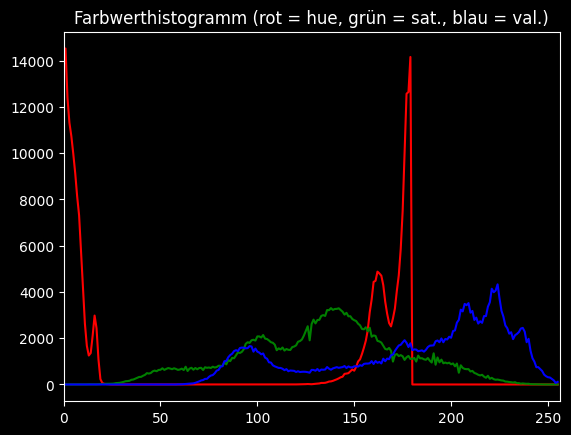

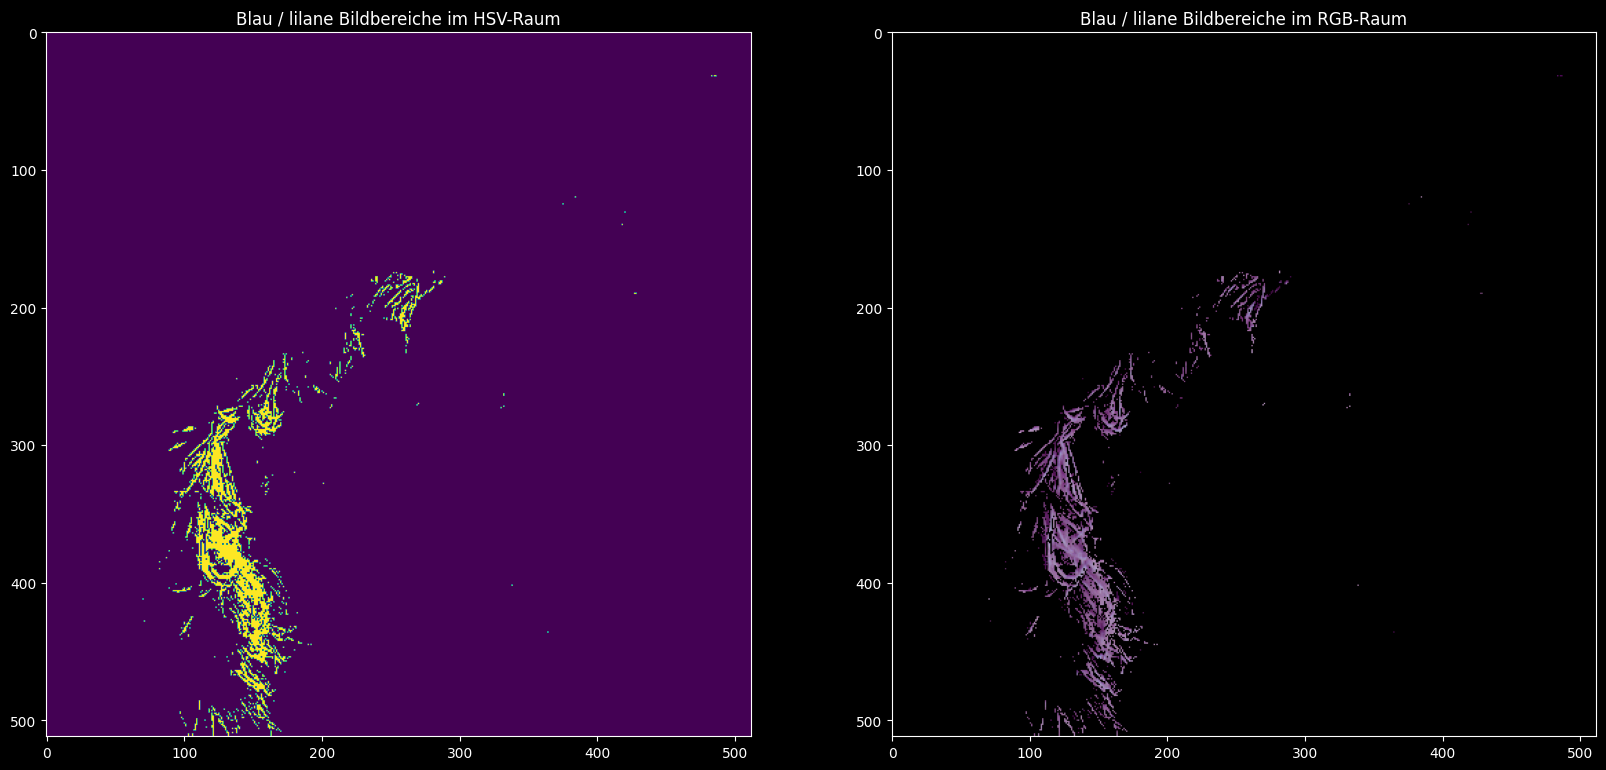

In [10]:
# konvertiere RGB zu HSV
img_hsv = cv.cvtColor(img_rgb, cv.COLOR_RGB2HSV)

# betrachte zunächst Histogramm des Bildes, um Farbwerte näher zu analysieren
color = ('r','g','b')
plt.figure()
for i,col in enumerate(color):
    histr = cv.calcHist([img_hsv],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Farbwerthistogramm (rot = hue, grün = sat., blau = val.)')
plt.show()

# filtere blauen Anteil heraus
img_blue = cv.inRange(img_hsv, np.array([80, 50, 50]), np.array([150, 255, 255]))
img_filtered = img_rgb.copy()
img_filtered[np.where(img_blue==0)] = 0

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img_blue)
plt.title('Blau / lilane Bildbereiche im HSV-Raum')
plt.subplot(1,2,2)
plt.imshow(img_filtered)
plt.title('Blau / lilane Bildbereiche im RGB-Raum')
plt.show()

## Aufgabe: Filtern Sie die gelbe Spurmarkierung aus dem Eingangsbild

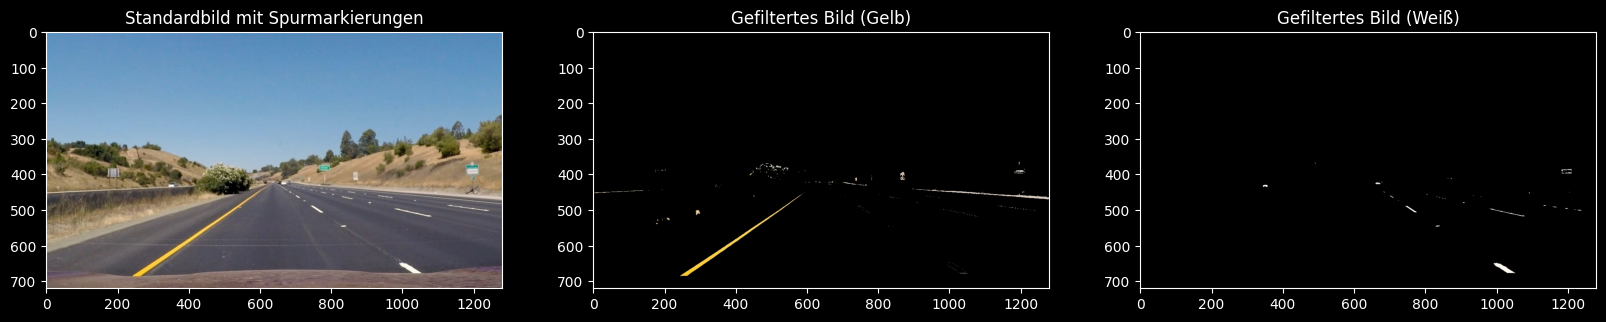

In [11]:
# TODO: Filtern Sie die gelbe Spurmarkierung aus dem Eingangsbild
# lade das Bild mit Spurmarkierungen und zeige es an
img_lane = cv.imread(str(img_dir / 'image001.jpg'), -1)
img_lane = cv.cvtColor(img_lane, cv.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(img_lane)
plt.title('Standardbild mit Spurmarkierungen')

img_lane_white = cv.inRange(img_lane, np.array([210, 210, 210]), np.array([255, 255, 255]))
img_lane_yellow = cv.inRange(img_lane, np.array([190, 190, 0]), np.array([255, 255, 200]))
img_lane_filtered_yellow = img_lane.copy()
img_lane_filtered_white = img_lane.copy()
img_lane_filtered_yellow[np.where(img_lane_yellow==0)] = 0
img_lane_filtered_white[np.where(img_lane_white==0)] = 0

# Zeige das Ergebnis an
plt.subplot(1,3,2)
plt.imshow(img_lane_filtered_yellow)
plt.title("Gefiltertes Bild (Gelb)")
plt.subplot(1,3,3)
plt.imshow(img_lane_filtered_white)
plt.title("Gefiltertes Bild (Weiß)")
plt.show()

## Aufgabe: Wenden Sie Ihr wissen auf Tempolimits an
Bitte heben Sie in folgenden Bildern die Tempolimits mit Ihrem gelernten Wissen hervor.
Die Bilder sind der German Traffic Sign Detection Benchmark (GTSDB) entnommen.
[Link zum GTSDB](https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/published-archive.html)

In [12]:
def filter_image(img: Mat):
  img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
  img_hls = cv.cvtColor(img, cv.COLOR_RGB2HLS)
  
  img_filter_white = cv.inRange(img_hls, np.array([100, 55, 0]), np.array([150, 145, 65]))
  # img_filter_white_2 = cv.inRange(img_hsl, np.array([135, 65, 0]), np.array([179, 125, 255]))
  # img_filter_white = cv.bitwise_or(img_filter_white_1, img_filter_white_2)
  img_filter_red_1 = cv.inRange(img_hsv, np.array([0, 0, 55]), np.array([25, 175, 115]))
  img_filter_red_2 = cv.inRange(img_hsv, np.array([165, 0, 55]), np.array([179, 175, 115]))
  img_filter_red = cv.bitwise_or(img_filter_red_1, img_filter_red_2)
  mask = cv.bitwise_or(img_filter_white, img_filter_red)
  target = cv.bitwise_and(img, img, mask=mask)
  
  plt.figure(figsize=(20,10))
  plt.subplot(1,4,1)
  plt.imshow(img)
  plt.title("Normales Bild")
  plt.subplot(1,4,2)
  plt.imshow(img_filter_white)
  plt.title("Filter (Weiß)")
  plt.subplot(1,4,3)
  plt.imshow(img_filter_red)
  plt.title("Filter (Rot)")
  plt.subplot(1,4,4)
  plt.imshow(target)
  plt.title("Gefiltertes Bild")
  plt.show()
  # plt.title('Standardbild mit Spurmarkierungen')

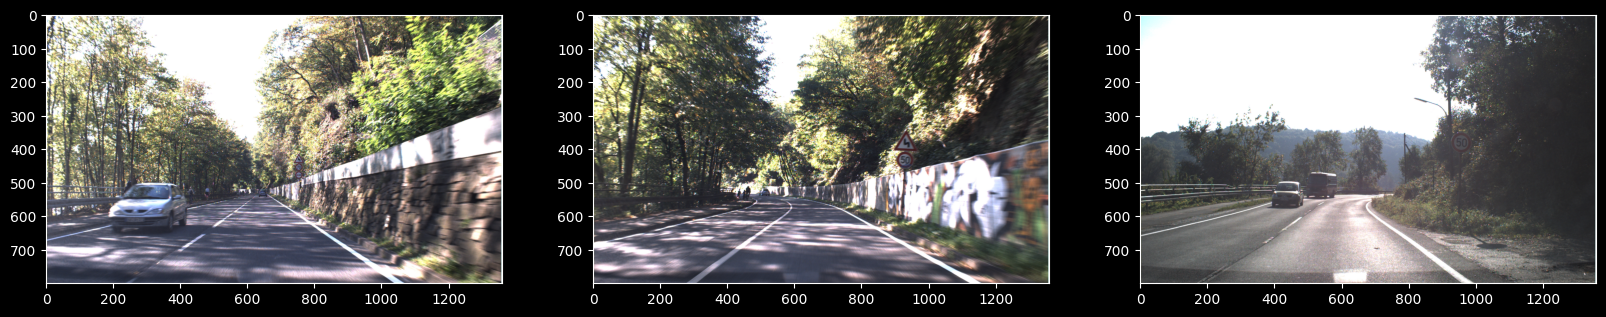

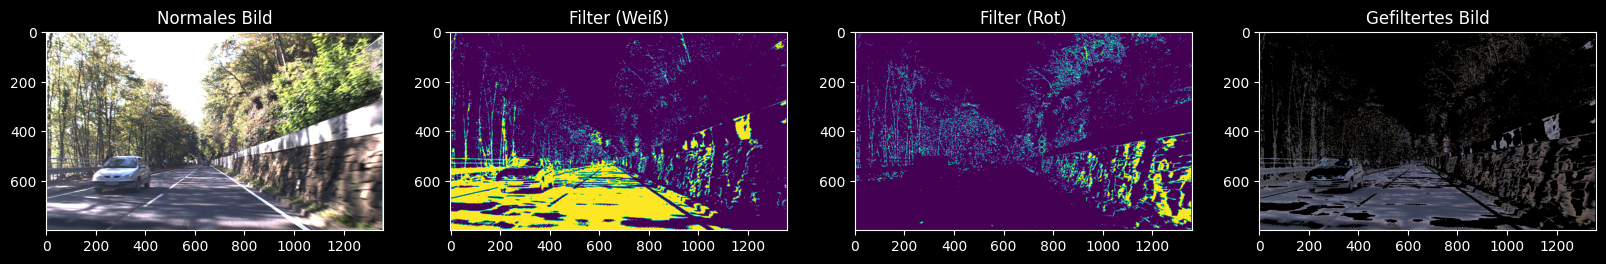

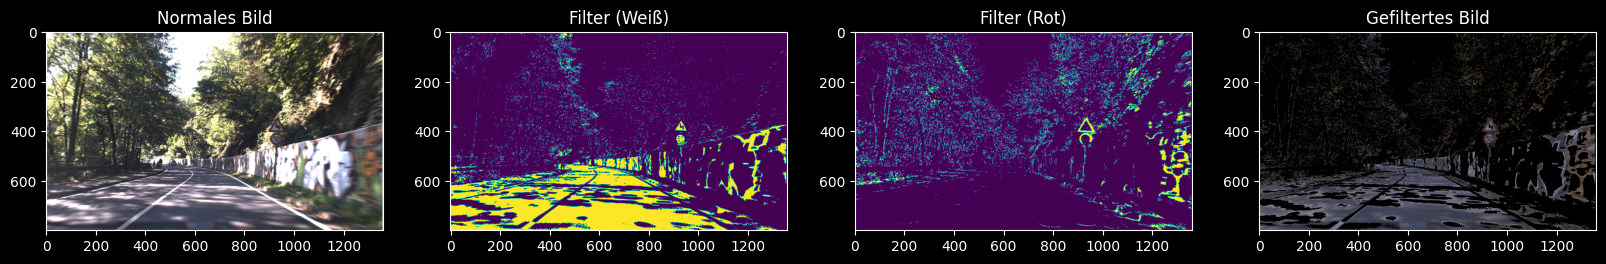

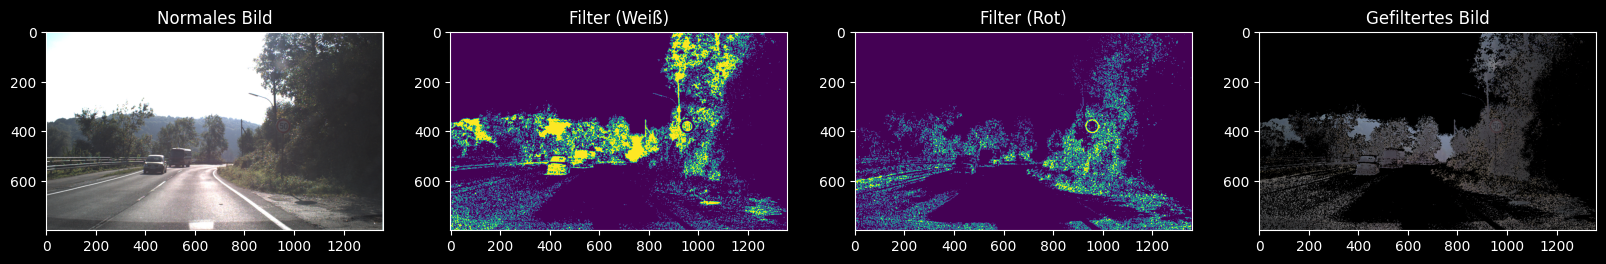

In [13]:
# TODO: Bitte heben Sie in folgenden Bildern die Tempolimits mit Ihrem gelernten Wissen hervor.
# lade Bilder mit Tempolimits und zeige diese an
img1 = cv.cvtColor(cv.imread(str(img_dir / '00003.bmp'), -1), cv.COLOR_BGR2RGB) 
img2 = cv.cvtColor(cv.imread(str(img_dir / '00004.bmp'), -1), cv.COLOR_BGR2RGB)
img3 = cv.cvtColor(cv.imread(str(img_dir / '00006.bmp'), -1), cv.COLOR_BGR2RGB)

img_container = [img1, img2, img3]

%matplotlib inline
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(img1)
plt.subplot(1,3,2)
plt.imshow(img2)
plt.subplot(1,3,3)
plt.imshow(img3)
plt.show()

for img in img_container:
  filter_image(img)